<a href="https://colab.research.google.com/github/Ishika355/Disease-Predictor/blob/main/HeartDisease_PRedictor_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**


In [345]:
import pandas as pd  # Imports the pandas library and aliases it as pd.

# **2. Importing the Dataset**


In [346]:
data = pd.read_csv('heart.csv') # Reads a CSV file named heart.csv into a Pandas DataFrame named data.

In [347]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **3. Taking care of Missing Values**


* ***age***: Age of the patient.
* ***sex***: Biological sex of the patient.
* ***cp***: Chest pain type.
* ***trtbps***: Resting blood pressure.
* ***chol***: Serum cholesterol.
* ***fbs***: Fasting blood sugar.
* ***restecg***: Resting electrocardiographic results.
* ***thalachh***: Maximum heart rate achieved.
* ***exng***: Exercise-induced angina.
* ***oldpeak***: ST depression induced by exercise relative to rest.
* ***slp***: Slope of the peak exercise ST segment.
* ***caa***: Number of major vessels colored by fluoroscopy.
* ***thall***: Thalium stress test result.
* ***output***: The target variable, indicating the presence or absence of heart disease.

In [348]:
data.isnull() #Checks for missing values in the DataFrame data and returns a boolean DataFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [349]:
data.isnull().sum() #Counts the number of missing values in each column of the DataFrame data.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# **4. Taking care of Duplicate Values**


In [350]:
data_dup=data.duplicated().any() #Checks if there are any duplicate rows in the DataFrame data.

In [351]:
data_dup #A boolean value indicating whether there are any duplicate rows in the DataFrame data.

True

In [352]:
data=data.drop_duplicates() #Removes any duplicate rows from the DataFrame data.

In [353]:
data_dup=data.duplicated().any() #Checks if there are any duplicate rows in the DataFrame data after removing duplicates.

In [354]:
data_dup #A boolean value indicating whether there are any duplicate rows in the DataFrame data.

False

# **5. Data Pre-Processing**


In [355]:
#Imagine you have a table with columns like "eye color", "height", and "favorite food".

# Categorical columns have a limited number of possible values, like "eye color" (blue, brown, green, etc.) or "favorite food" (pizza, pasta, burgers, etc.).
# Numerical columns have values that can be any number, like "height" (5 feet, 6 feet, etc.).
# In the code above, we're separating the columns into two lists:

# cate_val will contain columns like "eye color" and "favorite food" because they have a limited number of unique values.
# cont_val will contain columns like "height" because it can have any numerical value.

In [356]:
cate_val=[] #Columns which contain categorical values
cont_val=[] #Columns which contain numerical values

# Separates the columns in the DataFrame data into categorical and numerical
# based on the number of unique values in each column.
for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [357]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [358]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# **6. Encoding Categorical Data**


In [359]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [360]:
data['cp'].unique() #Returns an array of unique values in the cp column of the DataFrame data.

array([3, 2, 1, 0])

In [361]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

This line performs one-hot encoding on the columns specified in cate_val. The drop_first=True argument indicates that the first level of each categorical variable should be dropped to avoid multicollinearity.
***One-hot encoding is a technique used to represent categorical variables as binary vectors. For example, if the cp column in the heart disease dataset contains three categories (0, 1, 2), one-hot encoding will create three new columns: cp_1, cp_2, and cp_3. Each row in these new columns will have a value of 1 for the corresponding category and 0 for the other two categories.***

By performing one-hot encoding, categorical variables can be converted into a format that is more suitable for machine learning algorithms.

# **7. Feature Scaling**


In [362]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [363]:
from sklearn.preprocessing import StandardScaler #The StandardScaler class in scikit-learn is used to standardize features by removing the mean and scaling to unit variance.

In [364]:
st = StandardScaler() #his line standardizes the columns specified in cont_val using the fit_transform() method of the StandardScaler object.
data[cont_val] = st.fit_transform(data[cont_val]) #method first calculates the mean and standard deviation of each feature in the training data. It then uses these values to transform both the training and test data.

In [365]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# **8. Splitting The Dataset Into The Training Set And Test Set**


In [366]:
X= data.drop('output', axis=1)

In [367]:
y= data['output']

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [370]:
X_train

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [371]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: output, Length: 241, dtype: int64

In [372]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: output, Length: 61, dtype: int64

# **9. Logistic Regression**


In [373]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [374]:
from sklearn.linear_model import LogisticRegression

In [375]:
log =LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [376]:
y_pred1 = log.predict(X_test)

In [377]:
from sklearn.metrics import accuracy_score

In [378]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

# **10. SVC (Support Vector Classifier)**


In [379]:
from sklearn import svm

In [380]:
svm = svm.SVC()

In [381]:
svm.fit(X_train,y_train)

SVC()

In [382]:
y_pred2 = svm.predict(X_test)

In [383]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

# **11. KNeighbors Classifier**


In [384]:
from sklearn.neighbors import KNeighborsClassifier

In [385]:
knn = KNeighborsClassifier()

In [386]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [387]:
y_pred3 = knn.predict(X_test)

In [388]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [389]:
score = []
for k in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

In [390]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [391]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

# **Non-Linear ML Algorithms**


In [392]:
data = pd.read_csv('heart.csv')

In [393]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [394]:
data = data.drop_duplicates()

In [395]:
data.shape

(302, 14)

In [396]:
X = data.drop('output', axis=1)
y= data['output']

In [397]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# **12. Decision Tree Classifier**


In [398]:
from sklearn.tree import DecisionTreeClassifier

In [399]:
dt = DecisionTreeClassifier()

In [400]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [401]:
y_pred4 = dt.predict(X_test)

In [402]:
accuracy_score(y_test,y_pred4)

0.8032786885245902

# **13. Random Forest Classifier**


In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
rf = RandomForestClassifier()

In [405]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [406]:
y_pred5 = rf.predict(X_test)

In [407]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

# **14. Gradient Boosting Classifier**


In [408]:
from sklearn.ensemble import GradientBoostingClassifier

In [409]:
gbc = GradientBoostingClassifier()

In [410]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [411]:
y_pred6 = gbc.predict(X_test)

In [412]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [413]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                             accuracy_score(y_test,y_pred2),
                                                                             accuracy_score(y_test,y_pred3),
                                                                             accuracy_score(y_test,y_pred4),
                                                                             accuracy_score(y_test,y_pred5),
                                                                             accuracy_score(y_test,y_pred6)]})

In [414]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.803279
4,RF,0.852459
5,GB,0.852459


In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-416-1a44299c4c10>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Models", y="ACC", data=final_data, palette="Set2")


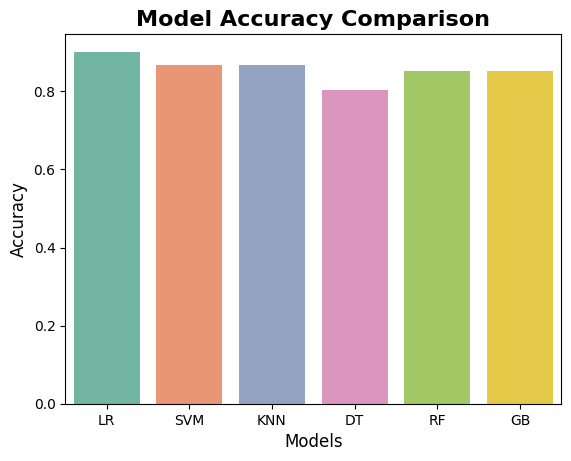

In [416]:
sns.barplot(x="Models", y="ACC", data=final_data, palette="Set2")
# Set the title of the plot
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold")

# Set the font of the labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Show the plot
plt.show()

In [417]:
X= data.drop('output', axis=1)
y= data['output']

In [418]:
X.shape

(302, 13)

In [419]:
from sklearn.linear_model import LogisticRegression

In [420]:
log = LogisticRegression()
log.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Prediction on New Data**

In [421]:
import pandas as pd

In [422]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trtbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalachh':168,
    'exng':0,
    'oldpeak':1.0,
    'slp':2,
    'caa':2,
    'thall':3,
},index=[0])

In [423]:
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [424]:
p = log.predict(new_data)
if p[0]==0:
  print("No disease")
else:
  print("Disease")

No disease


# **16. Save Model Using Joblib**

In [425]:
import joblib

In [426]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [427]:
model = joblib.load('model_joblib_heart')

In [428]:
model.predict(new_data)

array([0])

# **GUI**

In [432]:
from tkinter import *
import joblib

In [446]:
!git clone https://github.com/Xpra-org/xpra.git

Cloning into 'xpra'...
remote: Enumerating objects: 261327, done.
remote: Counting objects: 100% (4059/4059), done.
remote: Compressing objects: 100% (1356/1356), done.
remote: Total 261327 (delta 2785), reused 3938 (delta 2693), pack-reused 257268
Receiving objects: 100% (261327/261327), 58.40 MiB | 22.02 MiB/s, done.
Resolving deltas: 100% (212896/212896), done.


In [452]:
!python3 xpra/setup.py install

xpra/setup.py install
Xpra version 6.0
found Cython version 3.0.9
found pkg-config version: 0.29.2
ARCH='x86_64'
using INCLUDE_DIRS=['/usr/include', '/usr/local/include']
CC='gcc'
CPP='cpp'
build switches:
* Os                   : No
* PIC                  : Yes
* Xdummy               : Auto
* Xdummy_wrapper       : Auto
* annotate             : No
* argb                 : Yes
* argb                 : Yes
* argb_encoder         : Yes
* argb_encoder         : Yes
* argb_encoder         : Yes
* audio                : Yes
* avif                 : No
* avif                 : No
* avif_decoder         : No
* avif_decoder         : No
* avif_decoder         : No
* avif_encoder         : No
* avif_encoder         : No
* avif_encoder         : No
* brotli               : Yes
* brotli               : Yes
* bundle_tests         : No
* client               : Yes
* client               : Yes
* clipboard            : Yes
* codecs               : Yes
* codecs               : Yes
* codecs            

In [453]:
xpra start :10

SyntaxError: invalid syntax (<ipython-input-453-2af8a3d46b5e>, line 1)

In [430]:
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e2.get())
  p3=int(e3.get())
  p4=int(e4.get())
  p5=int(e5.get())
  p6=int(e6.get())
  p7=int(e7.get())
  p8=int(e8.get())
  p9=int(e9.get())
  p10=float(e10.get())
  p11=int(e11.get())
  p12=int(e12.get())
  p13=int(e13.get())
  model = joblib.load('model_joblib_heart')
  result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
  if result==0:
    Label(master,text="No Heart Diseases").grid(row=31)
  else:
    Label(master,text="Possibility of Heart Diseases").grid(row=31)

master = Tk()
master.title("Heart disease Prediction System")
label = Label(master, text = "Heart disease Prediction System",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter value of CP").grid(row=3)
Label(master, text="Enter value of trtbps").grid(row=4)
Label(master, text="Enter value of chol").grid(row=5)
Label(master, text="Enter value of fbs").grid(row=6)
Label(master, text="Enter value of restecg").grid(row=7)
Label(master, text="Enter value of thalachh").grid(row=8)
Label(master, text="Enter value of exng").grid(row=9)
Label(master, text="Enter value of oldpeak").grid(row=10)
Label(master, text="Enter value of slp").grid(row=11)
Label(master, text="Enter value of caa").grid(row=12)
Label(master, text="Enter value of thall").grid(row=13)
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()


TclError: no display name and no $DISPLAY environment variable